##### Learning resource: Keras Official Website (https://keras.io/examples/vision/oxford_pets_image_segmentation/)
#### Please check HW_3_Solutions.pdf to see all the outputs

## Importing and loading the image sets  

In [12]:
import os
#importing all the functions from function.py
from function import *
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from IPython.display import Image, display 
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from PIL import ImageOps
import random

input_dir = "MaSTr1325_images_512x384/"
target_dir = "MaSTr1325_masks_512x384/"
img_size = (512, 384)
num_classes = 4
batch_size = 32

input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".jpg")
    ]
)
target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir) 
        if fname.endswith(".png") 
        and not fname.startswith(".")
    ]
) 

print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)

Number of samples: 1325
MaSTr1325_images_512x384/0001.jpg | MaSTr1325_masks_512x384/0001m.png
MaSTr1325_images_512x384/0002.jpg | MaSTr1325_masks_512x384/0002m.png
MaSTr1325_images_512x384/0003.jpg | MaSTr1325_masks_512x384/0003m.png
MaSTr1325_images_512x384/0004.jpg | MaSTr1325_masks_512x384/0004m.png
MaSTr1325_images_512x384/0005.jpg | MaSTr1325_masks_512x384/0005m.png
MaSTr1325_images_512x384/0006.jpg | MaSTr1325_masks_512x384/0006m.png
MaSTr1325_images_512x384/0007.jpg | MaSTr1325_masks_512x384/0007m.png
MaSTr1325_images_512x384/0008.jpg | MaSTr1325_masks_512x384/0008m.png
MaSTr1325_images_512x384/0009.jpg | MaSTr1325_masks_512x384/0009m.png
MaSTr1325_images_512x384/0010.jpg | MaSTr1325_masks_512x384/0010m.png


## Checking a image and its segmentation mask

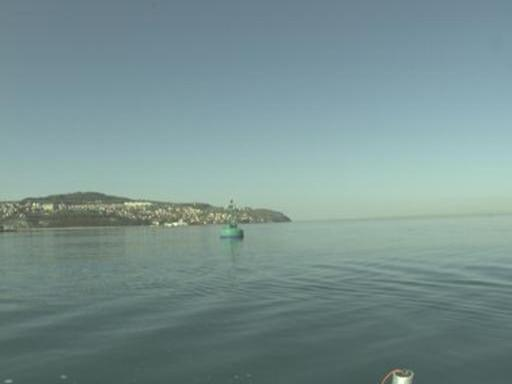

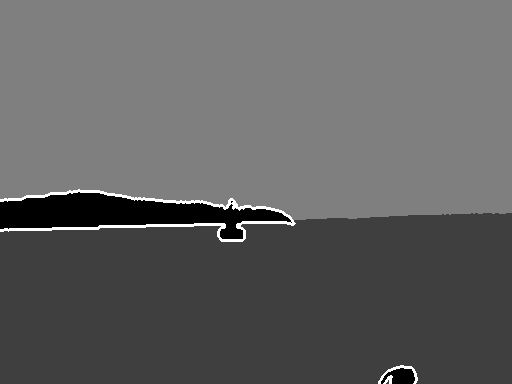

In [4]:
# Display input image #7
display(Image(filename=input_img_paths[9]))

# Display auto-contrast version of corresponding target (per-pixel categories)
img = ImageOps.autocontrast(load_img(target_img_paths[9]))
display(img)

## Getting the ML model architecture, using UNet 

In [6]:
from tensorflow.keras import layers
# Build model
model = get_model(img_size, num_classes)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 384, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_9 (Conv2D)              (None, 256, 192, 4)  112         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_15 (BatchN  (None, 256, 192, 4)  16         ['conv2d_9[0][0]']               
 ormalization)                                                                                    
                                                                                            

                                                                                                  
 conv2d_transpose_8 (Conv2DTran  (None, 32, 24, 32)  9248        ['activation_22[0][0]']          
 spose)                                                                                           
                                                                                                  
 batch_normalization_22 (BatchN  (None, 32, 24, 32)  128         ['conv2d_transpose_8[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 activation_23 (Activation)     (None, 32, 24, 32)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_transpose_9 (Conv2DTran  (None, 32, 24, 32)  9248        ['activation_23[0][0]']          
 spose)   

 batch_normalization_28 (BatchN  (None, 256, 192, 4)  16         ['conv2d_transpose_14[0][0]']    
 ormalization)                                                                                    
                                                                                                  
 activation_29 (Activation)     (None, 256, 192, 4)  0           ['batch_normalization_28[0][0]'] 
                                                                                                  
 conv2d_transpose_15 (Conv2DTra  (None, 256, 192, 4)  148        ['activation_29[0][0]']          
 nspose)                                                                                          
                                                                                                  
 batch_normalization_29 (BatchN  (None, 256, 192, 4)  16         ['conv2d_transpose_15[0][0]']    
 ormalization)                                                                                    
          

## Splitting the dataset into Training set, Cross Validation and Test set

In [7]:
train_samples = int (1325 * 0.7)
val_samples = train_samples + int (1325 * 0.2)

random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_img_paths)
train_input_img_paths = input_img_paths[:train_samples]
train_target_img_paths = target_img_paths[:train_samples]
val_input_img_paths = input_img_paths[train_samples:val_samples]
val_target_img_paths = target_img_paths[train_samples:val_samples]
test_input_img_paths = input_img_paths[val_samples:]
test_target_img_paths = target_img_paths[val_samples:]

train_gen = SeaKing(
    batch_size, img_size, train_input_img_paths, train_target_img_paths
)
val_gen = SeaKing(batch_size, img_size, val_input_img_paths, val_target_img_paths)


## Training the ML model

In [6]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

callbacks = [
    keras.callbacks.ModelCheckpoint("SeaKing.h5", save_best_only=True)
]

# Train the model, doing validation at the end of each epoch.
epochs = 40
history = model.fit(train_gen, epochs=epochs, validation_data=val_gen, callbacks=callbacks)

Epoch 1/40
28/28 [==============================] - 110s 4s/step - loss: 0.5022 - val_loss: 1.1625
Epoch 2/40
28/28 [==============================] - 107s 4s/step - loss: 0.2243 - val_loss: 1.7156
Epoch 3/40
28/28 [==============================] - 103s 4s/step - loss: 0.1855 - val_loss: 2.2282
Epoch 4/40
28/28 [==============================] - 101s 4s/step - loss: 0.1612 - val_loss: 2.5915
Epoch 5/40
28/28 [==============================] - 105s 4s/step - loss: 0.1467 - val_loss: 2.8407
Epoch 6/40
28/28 [==============================] - 108s 4s/step - loss: 0.1369 - val_loss: 2.5838
Epoch 7/40
28/28 [==============================] - 102s 4s/step - loss: 0.1286 - val_loss: 2.7267
Epoch 8/40
28/28 [==============================] - 103s 4s/step - loss: 0.1220 - val_loss: 2.5417
Epoch 9/40
28/28 [==============================] - 113s 4s/step - loss: 0.1166 - val_loss: 2.4312
Epoch 10/40
28/28 [==============================] - 104s 4s/step - loss: 0.1109 - val_loss: 1.6837
Epoch 11/

## Plotting the Train and Cross-validation loss graph

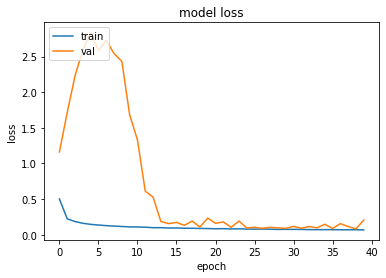

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Comparing Groundtruth segmentation mask and Nural Networks's mask

In [ ]:
val_gen = SeaKing(batch_size, img_size, val_input_img_paths, val_target_img_paths)
val_preds = model.predict(val_gen)

i = 11

display(Image(filename=val_input_img_paths[i]))

# Display ground-truth target mask
img = ImageOps.autocontrast(load_img(val_target_img_paths[i]))
display(img)

# Display mask predicted by our NN model
display_mask(i)